In [1]:
"""
Notebook utilizado para apresentar uma introdução à teoria da amostragem de sinais.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.

Protegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais
desde que citada a fonte.

Prof. Dr. Emerson Rodrigo Almeida
emerson.almeida@ufu.br

Última modificação: 03/02/2021
"""

'\nNotebook utilizado para apresentar uma introdução à teoria da amostragem de sinais.\nCriado para a disciplina Geofísica I da Universidade Federal de Uberlândia.\n\nProtegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais\ndesde que citada a fonte.\n\nProf. Dr. Emerson Rodrigo Almeida\nemerson.almeida@ufu.br\n\nÚltima modificação: 03/02/2021\n'

# Instruções iniciais

Neste notebook você irá aprender como a digitalização de um sinal analógico é feita corretamente a partir dos intervalos de amostragem. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula**. Você pode executar o código na célula clicando no botão RUN na barra do Jupyter Notebook ou pressionando as teclas SHIFT+ENTER no seu teclado.

In [2]:
from scipy.interpolate import interp1d
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



def gera_onda_quadrada(t_w, T, A):
    t_w = np.arange(0, t_w, t_w/1000)
    s_w = A * np.sign(np.sin(2 * np.pi * (1/T) * t_w))
    
    return s_w, t_w
    

def calcula_serie(tt, nh, T, A):
    ww = 2 * np.pi * (1/T)              # frequência angular
    y = np.zeros(np.shape(tt))          # inicializa com valores de a0, que para esta onda vai ser zero

    for n in range(1, nh+1):
        
        if n%2 != 0:
            bn = (4.0 * A) / (np.pi * n)
        else:
            bn = 0

        y = y + (bn * np.sin(n * ww * tt))
        
    return y
    
    
def plota_onda_quadrada(tt, sw, titulo):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(tt, sw, '-b')
    ax.set_title(titulo, fontsize=14)
    ax.set_xlim([0, tt[-1]])
    ax.set_ylim([np.min(sw)+0.25*np.min(sw), np.max(sw)+0.25*np.max(sw)])
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.grid()

    
def plota_serie(tt, s_t, sw, titulo):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(tt, sw, '--b', label='Onda quadrada')
    ax.plot(tt, s_t, '-r', label='$f(t)$ calculada')
    ax.set_title(titulo, fontsize=14)
    ax.set_xlim([0, tt[-1]])
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.grid()
    ax.legend(loc='lower right', fontsize=12)
    

# Passo 02 - Definição da onda quadrada

Primeiramente vamos definir os parâmetros que definem nossa onda quadrada, que são seu período ($T$) e sua amplitude ($A$). Vamos considerar $T$ = 2.0 s e $A$ = 1.0 ua. Vamos estabelecer também a janela de tempo para visualização da onda em 10.0 s.

Execute a célula abaixo para definir estes parâmetros.

In [6]:
amp = 1.0                            # amplitude em ua
janela_tempo = 10.0                  # janela de tempo em segundos
periodo = 4.0                        # período da onda em segundos

Vamos agora gerar a onda quadrada visualizá-la executando a célula abaixo:

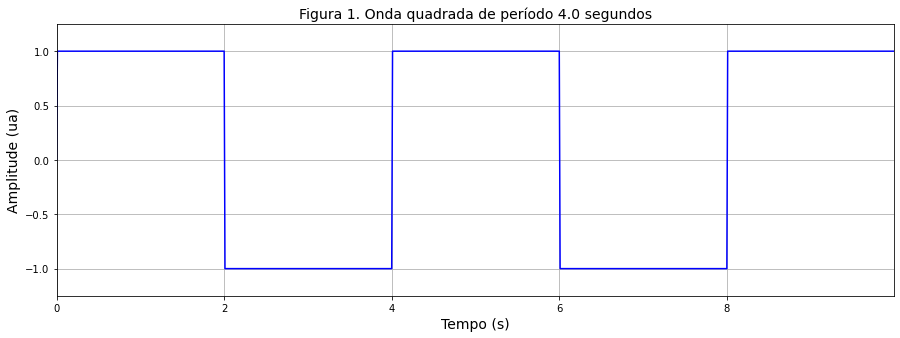

In [7]:
onda, tempo = gera_onda_quadrada(janela_tempo, periodo, amp)
plota_onda_quadrada(tempo, onda, "Figura 1. Onda quadrada de período " + str(periodo) + " segundos")

# Passo 03 - Aproximação por série de Fourier

A série de Fourier é uma ferramenta matemática que permite representar uma função periódica qualquer através de um somatório infinito de senos e cossenos de múltiplos inteiros da frequência característica desta função. A frequência da função periódica recebe o nome de *frequência fundamental*, e seus múltiplos são denominados *harmônicos*. Uma função periódica qualquer de período $T$ pode ser representada através de uma série de Fourier $f(t)$ através da equação abaixo:

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}\left[a_n cos\left(\frac{\pi nt}{(T/2)}\right) + b_n cos\left(\frac{\pi nt}{(T/2)}\right)\right] $$

em que $a_0$ é o coeficiente associado à meia amplitude da onda, $n$ é o número de harmônicos considerados para a série, $a_n$ e $b_n$ são os coeficientes associados a cada harmônico. A equação acima é equivalente a

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}\left[a_n cos\left(2 \pi n f t\right) + b_n sen\left(2 \pi n f t\right)\right]   $$

se quisermos escrever a série em termos da frequência fundamental $f = 1/T$.

As equações acima representam a forma geral da série de Fourier, em que pode-se utilizar coeficientes específicos para representar diferentes formas de onda. Por exemplo, a série de Fourier que representa a onda quadrada mostrada na Figura 1 tem coeficientes $a_0 = 0$, $a_n$ = 0, $b_n = 0$ para harmônicos pares ($n$ = 0, 2, 4, ...), $b_n = (4A)/(n\pi)$ para harmônicos ímpares ($n$ = 1, 3,5 ,7 ,...) e assume a forma

$$ f(t) = \sum_{n=1}^{\infty}[b_n cos(2 \pi nft)] $$

A dedução para obtenção dos coeficientes foge ao escopo desta demonstração, mas caso você queira entender como estes coeficientes são obtidos recomendo assistir [esta sequência de dez vídeos da Khan Academy sobre o assunto](https://www.khanacademy.org/science/electrical-engineering/ee-signals/ee-fourier-series/v/ee-fourier-series-intro) (em inglês).

Na prática não se pode definir um número infinito de harmônicos, de forma que precisamos estabelecer um valor limite de $n$ para o somatório, o qual chamaremos de $N$. Então, a equação $f(t)$ para a onda quadrada fica reescrita considerando-se um número finito de harmônicos como

$$ f(t) = \sum_{n=1}^{N}[b_n cos(2 \pi nft)] $$

Execute a célula abaixo para visualizar a função $f(t)$ obtida com apenas 1 harmônico (i.e., $N$ = 1).

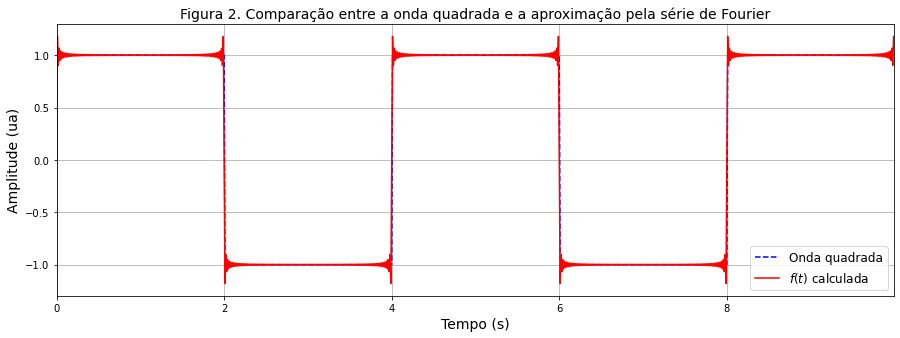

In [8]:
N = 1        # número de harmônicos

f_t = calcula_serie(tempo, N, periodo, amp)
plota_serie(tempo, f_t, onda, "Figura 2. Comparação entre a onda quadrada e a aproximação pela série de Fourier")

**Pergunta:** Qual o período da função $f(t)$ calculada? Qual a sua amplitude? Agora volte à celula anterior e aumente o número de harmônicos. Verifique como fica a $f(t)$ calculada com $n$ = 2, 3, 4, 5, ..., $k$ harmônicos, onde $k$ é um número inteiro qualquer. Como isto altera o comportamento da função? 

Você perceberá que para determinados valores de $n$ surgem picos próximos às bordas da onda quadrada. Este comportamento é denominado *fenômeno de Gibbs*, e surge em pontos em que a função a ser representada pela série de Fourier é caracterizada por uma descontinuidade.

# Exercício

Modifique os parâmetros que caracterizam a onda quadrada na primeira célula do Passo 02. Utilize diferentes frequências e amplitudes, e verifique como isto afeta o número de harmônicos necessários para se obter uma boa representação da onda quadrada.

**Observações: a)** Modifique apenas os números. Não modifique os nomes das variáveis, ou o código poderá haver problemas na execução do código. **b)** Após modificar os parâmetros do sinal analógico na célula correspondente será necessário executá-la e executar as células seguintes novamente, uma a uma e em ordem, para que as figuras sejam geradas corretamente. **c)** Caso tenha qualquer problema com a execução do código experimente clicar em "Kernel > Restart & Clear Output" na barra acima. Se o problema persistir entre em contato comigo reportando o problema em detalhes.